<a href="https://colab.research.google.com/github/lalitha-sahitya/Credit_Card_Fraud_Detection/blob/main/creditcard_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import os
import warnings
warnings.filterwarnings('ignore')

In [89]:
!pip install opendatasets

In [90]:
import opendatasets as od

In [91]:
od.download('https://www.kaggle.com/datasets/kushagraddata/credit-card-fraud-detectionset')

Skipping, found downloaded files in "./credit-card-fraud-detectionset" (use force=True to force download)


In [92]:
os.listdir('credit-card-fraud-detectionset')

['credit_card_fraud_detection.csv']

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
data=pd.read_csv('/content/credit-card-fraud-detectionset/credit_card_fraud_detection.csv')
data.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date,Merchant Name,Merchant Category,Country,Card Type,Fraudulent,Transaction Method,User Age,User Gender,Account Balance,Transaction Time,Transaction Location
0,T00001,U0001,21.62,2022-10-19,Walmart,Health & Wellness,USA,Credit,No,Online,71,Non-Binary,25786.02,08:27,Rural
1,T00002,U0002,76.66,2023-03-10,Apple Store,Health & Wellness,India,Prepaid,No,Online,80,Non-Binary,25347.05,17:58,Suburban
2,T00003,U0003,494.52,2023-01-14,Best Buy,Retail,Germany,Credit,No,In-Store,48,Male,38215.24,09:28,Rural
3,T00004,U0004,300.03,2023-11-04,Apple Store,Travel,Australia,Credit,Yes,ATM Withdrawal,70,Male,34663.70,09:00,Urban
4,T00005,U0005,746.05,2023-05-12,Starbucks,Electronics,South Africa,Debit,No,Online,30,Male,8763.38,03:24,Suburban


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Transaction ID        300 non-null    object 
 1   User ID               300 non-null    object 
 2   Transaction Amount    300 non-null    float64
 3   Transaction Date      300 non-null    object 
 4   Merchant Name         300 non-null    object 
 5   Merchant Category     300 non-null    object 
 6   Country               300 non-null    object 
 7   Card Type             300 non-null    object 
 8   Fraudulent            300 non-null    object 
 9   Transaction Method    300 non-null    object 
 10  User Age              300 non-null    int64  
 11  User Gender           300 non-null    object 
 12  Account Balance       300 non-null    float64
 13  Transaction Time      300 non-null    object 
 14  Transaction Location  300 non-null    object 
dtypes: float64(2), int64(1)

In [174]:
data['Transaction ID'].value_counts()

,count
Transaction ID,
T00001,1
T00207,1
T00205,1
T00204,1
T00203,1
...,...
T00100,1
T00099,1
T00098,1


In [175]:
data['User ID'].value_counts()

,count
User ID,
U0001,1
U0207,1
U0205,1
U0204,1
U0203,1
...,...
U0100,1
U0099,1
U0098,1


In [176]:
data=data.drop(['User ID','Transaction ID'],axis=1)

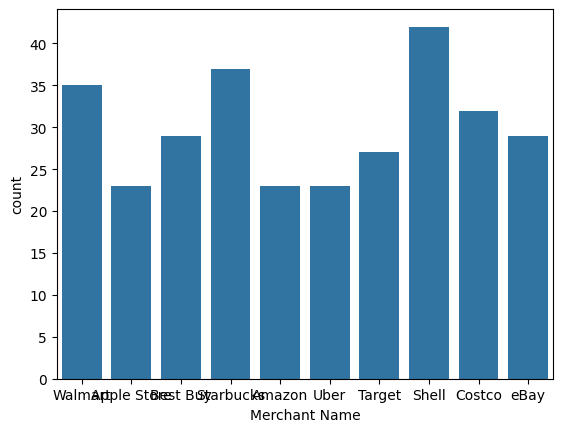

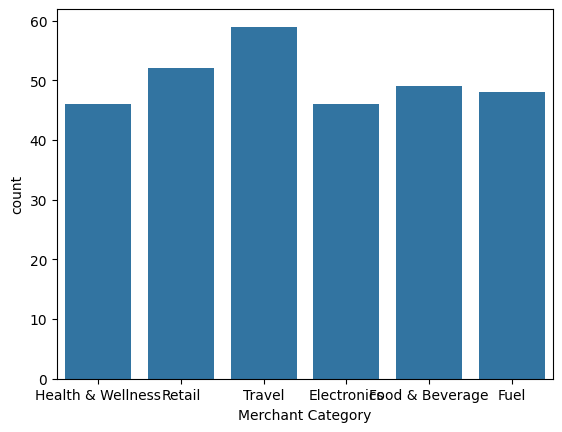

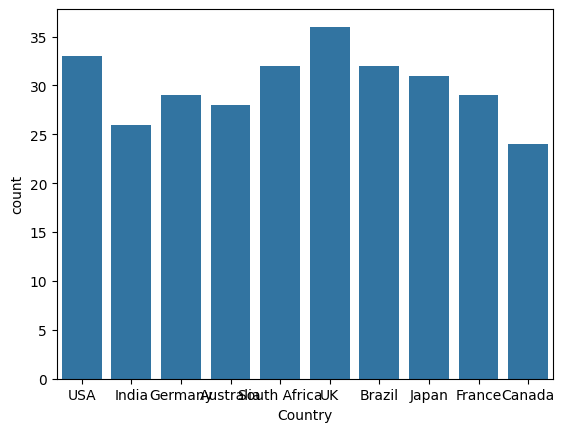

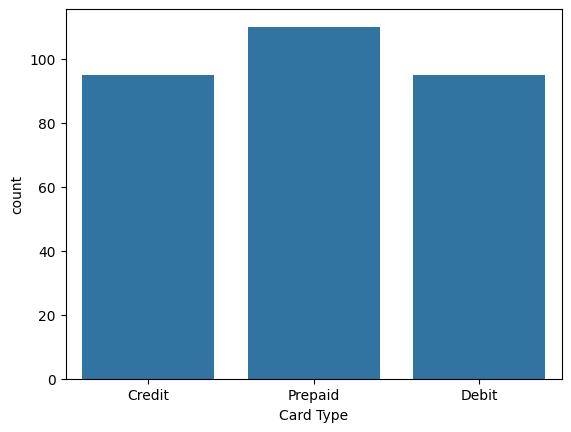

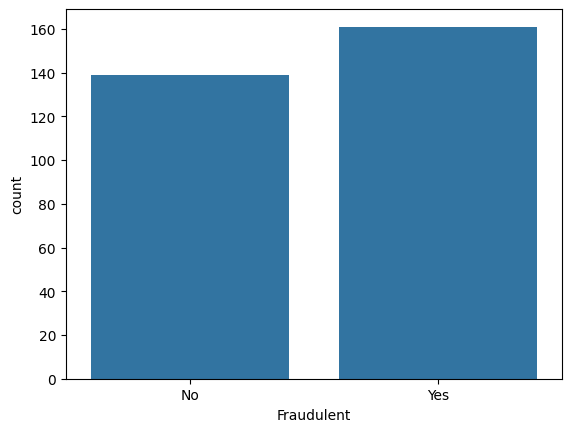

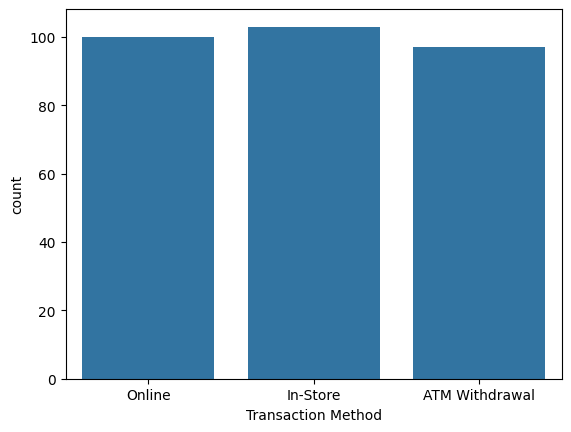

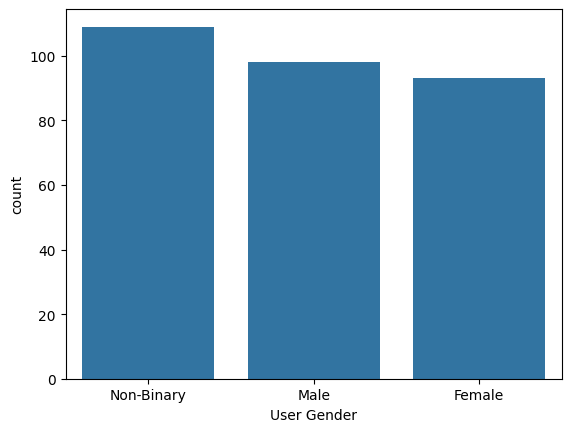

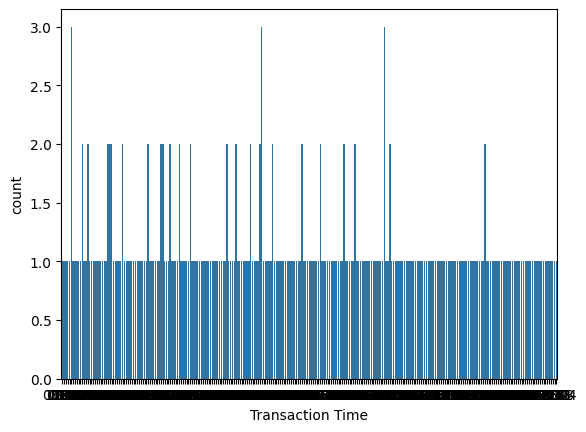

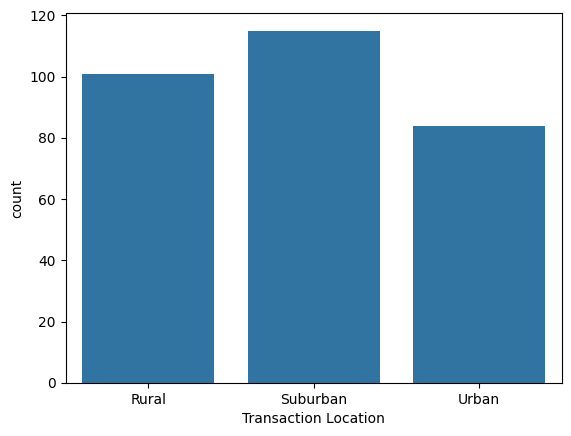

In [177]:
for i in data.select_dtypes(include='object').columns:
  if i!='Transaction Date':
    fig=sns.countplot(data=data,x=i)
    plt.show()

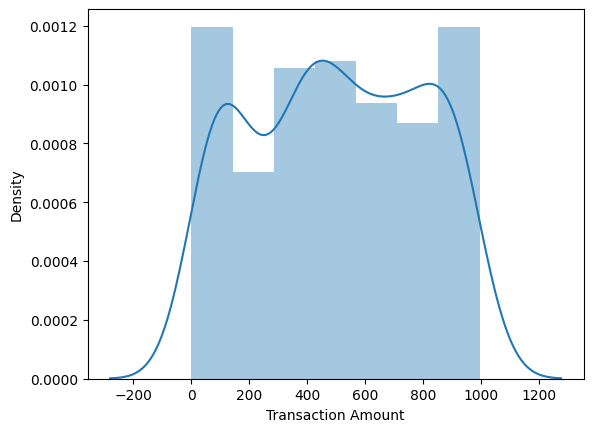

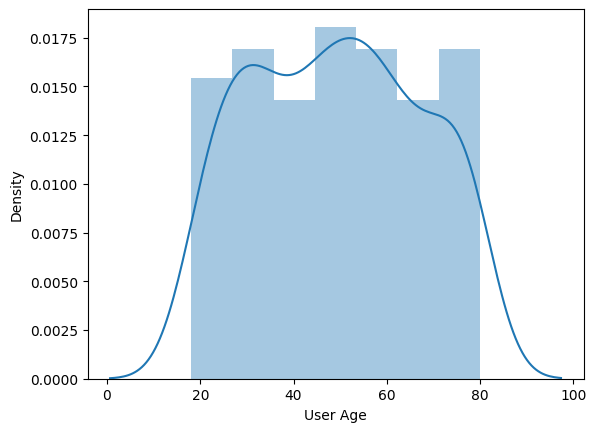

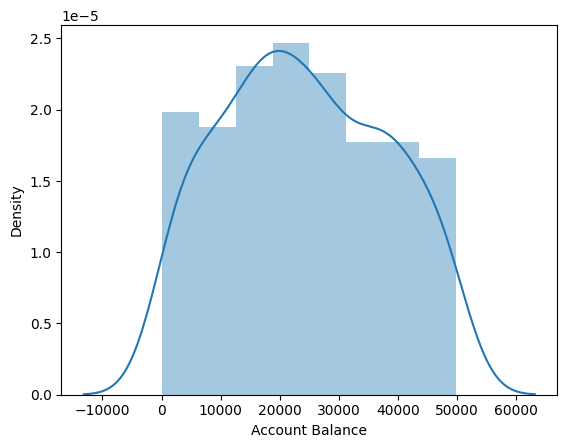

In [178]:
for i in data.select_dtypes(include='number').columns:
  sns.distplot(data[i])
  plt.show()

In [179]:
data.head()

,Transaction Amount,Transaction Date,Merchant Name,Merchant Category,Country,Card Type,Fraudulent,Transaction Method,User Age,User Gender,Account Balance,Transaction Time,Transaction Location
0,21.62,2022-10-19,Walmart,Health & Wellness,USA,Credit,No,Online,71,Non-Binary,25786.02,08:27,Rural
1,76.66,2023-03-10,Apple Store,Health & Wellness,India,Prepaid,No,Online,80,Non-Binary,25347.05,17:58,Suburban
2,494.52,2023-01-14,Best Buy,Retail,Germany,Credit,No,In-Store,48,Male,38215.24,09:28,Rural
3,300.03,2023-11-04,Apple Store,Travel,Australia,Credit,Yes,ATM Withdrawal,70,Male,34663.70,09:00,Urban
4,746.05,2023-05-12,Starbucks,Electronics,South Africa,Debit,No,Online,30,Male,8763.38,03:24,Suburban


In [180]:
data=data.drop(['Transaction Date','Transaction Time'],axis=1)
data.head()

,Transaction Amount,Merchant Name,Merchant Category,Country,Card Type,Fraudulent,Transaction Method,User Age,User Gender,Account Balance,Transaction Location
0,21.62,Walmart,Health & Wellness,USA,Credit,No,Online,71,Non-Binary,25786.02,Rural
1,76.66,Apple Store,Health & Wellness,India,Prepaid,No,Online,80,Non-Binary,25347.05,Suburban
2,494.52,Best Buy,Retail,Germany,Credit,No,In-Store,48,Male,38215.24,Rural
3,300.03,Apple Store,Travel,Australia,Credit,Yes,ATM Withdrawal,70,Male,34663.70,Urban
4,746.05,Starbucks,Electronics,South Africa,Debit,No,Online,30,Male,8763.38,Suburban


In [181]:
data['Country'].unique()

array(['USA', 'India', 'Germany', 'Australia', 'South Africa', 'UK',
       'Brazil', 'Japan', 'France', 'Canada'], dtype=object)

In [182]:
for i in data.select_dtypes(include='object').columns:
  print(data[i].unique())

['Walmart' 'Apple Store' 'Best Buy' 'Starbucks' 'Amazon' 'Uber' 'Target'
 'Shell' 'Costco' 'eBay']
['Health & Wellness' 'Retail' 'Travel' 'Electronics' 'Food & Beverage'
 'Fuel']
['USA' 'India' 'Germany' 'Australia' 'South Africa' 'UK' 'Brazil' 'Japan'
 'France' 'Canada']
['Credit' 'Prepaid' 'Debit']
['No' 'Yes']
['Online' 'In-Store' 'ATM Withdrawal']
['Non-Binary' 'Male' 'Female']
['Rural' 'Suburban' 'Urban']


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Transaction Amount    300 non-null    float64
 1   Merchant Name         300 non-null    object 
 2   Merchant Category     300 non-null    object 
 3   Country               300 non-null    object 
 4   Card Type             300 non-null    object 
 5   Fraudulent            300 non-null    object 
 6   Transaction Method    300 non-null    object 
 7   User Age              300 non-null    int64  
 8   User Gender           300 non-null    object 
 9   Account Balance       300 non-null    float64
 10  Transaction Location  300 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 25.9+ KB


In [184]:
x=data.drop('Fraudulent',axis=1)
y=data['Fraudulent']

In [185]:
labels=[]
for i in y:
  if i=='No':
    labels.append(0)
  else:
    labels.append(1)
labels=pd.Series(labels)

In [186]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,labels,test_size=0.2,random_state=42)

In [187]:
x_train.shape

(240, 10)

In [188]:
x_test.shape

(60, 10)

In [189]:
y_train.shape

(240,)

In [190]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in x.select_dtypes(include='object').columns:
  x_train[i]=enc.fit_transform(x_train[i])
  x_test[i]=enc.fit_transform(x_test[i])

In [191]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [192]:
x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)

In [193]:
x_train.head()

,Transaction Amount,Merchant Name,Merchant Category,Country,Card Type,Transaction Method,User Age,User Gender,Account Balance,Transaction Location
0,0.926495,1.000000,0.0,0.777778,0.0,1.0,0.596774,0.5,0.199676,0.0
1,0.575351,0.111111,0.2,0.333333,0.0,0.0,0.983871,1.0,0.985605,0.5
2,0.006326,0.000000,0.6,0.888889,0.0,1.0,0.629032,0.5,0.612682,0.5
3,0.715503,0.444444,0.4,1.000000,0.5,0.5,0.064516,0.0,0.017421,0.0
4,0.852396,0.222222,0.6,0.000000,0.0,0.0,0.500000,0.0,0.688478,1.0


In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [195]:
models=[LogisticRegression(),RandomForestClassifier(class_weight="balanced", random_state=42),DecisionTreeClassifier(),SVC(),KNeighborsClassifier()]

In [197]:
for i in models:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(i)
  print(accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred))

LogisticRegression()
0.4
              precision    recall  f1-score   support

           0       0.37      0.34      0.36        29
           1       0.42      0.45      0.44        31

    accuracy                           0.40        60
   macro avg       0.40      0.40      0.40        60
weighted avg       0.40      0.40      0.40        60

RandomForestClassifier(class_weight='balanced', random_state=42)
0.4666666666666667
              precision    recall  f1-score   support

           0       0.44      0.41      0.43        29
           1       0.48      0.52      0.50        31

    accuracy                           0.47        60
   macro avg       0.46      0.46      0.46        60
weighted avg       0.47      0.47      0.47        60

DecisionTreeClassifier()
0.45
              precision    recall  f1-score   support

           0       0.44      0.48      0.46        29
           1       0.46      0.42      0.44        31

    accuracy                           0.45